<a href="https://colab.research.google.com/github/voronv27/Lab1/blob/main/03_nvidia_dli_lab_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint E

## Lab Selected

I selected the Outlier Detection with IQR NVIDIA lab.

## Exercises Completed

All steps completed:
* Implement IQR algorithm with Python
* Test IQR on the attribute "LotArea" of training data of House Price
Prediction from Kaggle Data to detect and remove its outliers. The data can be
downloaded from Kaggle (https://www.kaggle.com/c/house-prices-advancedregression-techniques/overview ).
* Compare the original data and preprocessed data by plotting
(https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glrgallery-pyplots-boxplot-demo-pyplot-py)

## Key Results

Implement IQR algorithm with Python:

In [14]:
import numpy as np

def iqr_outlier_detection(totalData, attr):
  column = totalData[attr]
  data = np.array(column)

  # sort in ascending order
  sorted_data = np.sort(data)

  # calculate q1 and q3
  q1, q3 = np.percentile(sorted_data, [25, 75])

  # calculate iqr
  iqr = q3 - q1

  # calculate the lower range and upper range
  tLower = q1 - 1.5 * iqr
  tUpper = q3 + 1.5 * iqr

  # detect outliers not within the range
  outliers = totalData[(column < tLower) | (column > tUpper)]
  filtered_data = totalData[~((column < tLower) | (column > tUpper))]

  return outliers, filtered_data


Test IQR on the "LotArea" attribute of the training data from the training data found here: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [7]:
# open data file
import pandas as pd

path = 'train.csv'

data = pd.read_csv(path)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
outliers, filtered = iqr_outlier_detection(data, 'LotArea')

print("Number of outliers:", len(outliers))
print("Size of filtered data:", len(filtered))

Number of outliers: 69
Size of filtered data: 1391


Compare original and preprocessed data by plotting:

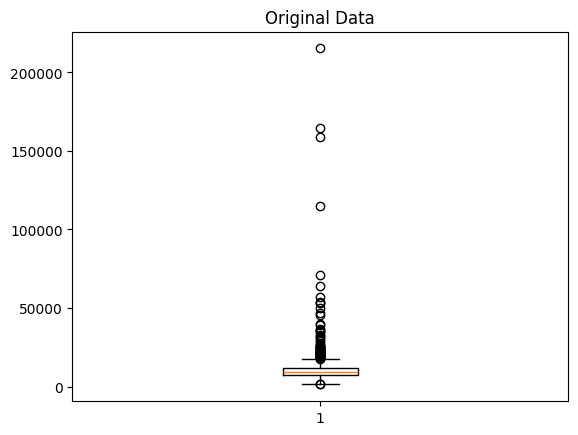

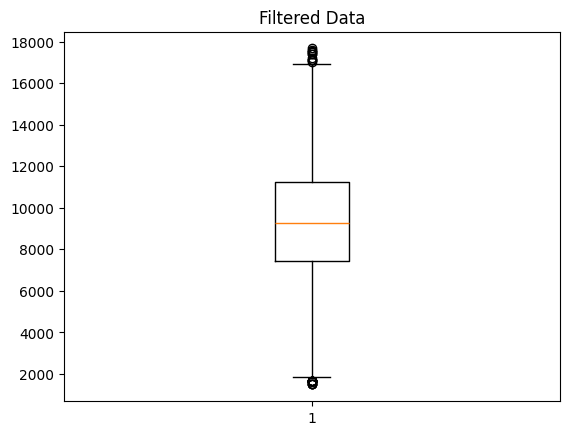

In [23]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Original Data')
ax1.boxplot(data['LotArea'])

fig2, ax2 = plt.subplots()
ax2.set_title('Filtered Data')
ax2.boxplot(filtered['LotArea'])

plt.show()

The filtered data has removed the really high outliers from the original data. While most of the data falls between the ~2000 to ~17000 range, there are outliers that go well above 17000, and even one outlier that goes past 200000. The filtered data boxplot still has "outliers" but they are much closer to the ends of the whiskers. The majority of the data is now tightly grouped.

## Issues Encountered & Troubleshooting Attempted

Originally, I implemented IQR on the entire data, rather than a specific column, i.e.

```
def iqr_outlier_detection(data, attr):
  # sort in ascending order
  sorted_data = np.sort(data)

  # calculate q1 and q3
  q1, q3 = np.percentile(sorted_data, [25, 75])

  # calculate iqr
  iqr = q3 - q1

  # calculate the lower range and upper range
  tLower = q1 - 1.5 * iqr
  tUpper = q3 + 1.5 * iqr

  # detect outliers not within the range
  outliers = [d for d in data if d < tLower or d > tUpper]
  filtered_data = [d for d in data if tLower <= d <= tUpper]

  return outliers, filtered_data
```

When I got to the next checkpoint and realized that the dataset would have multiple columns and we were simply choosing one to sort by, I had to modify the code to its current state.

At first, my boxplot failed because I didn't just take the 'LotArea' column of the data.

Error: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


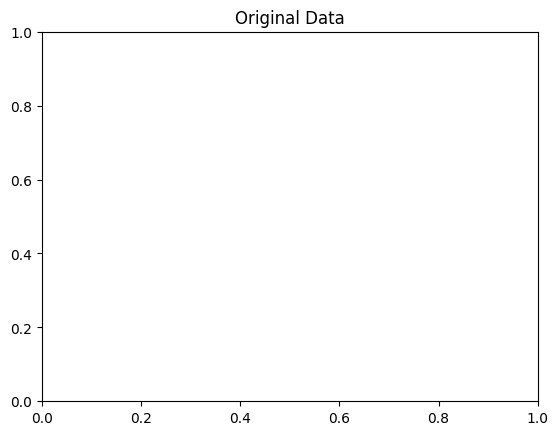

In [32]:
try:
  fig1, ax1 = plt.subplots()
  ax1.set_title('Original Data')
  ax1.boxplot(data) # causes error, should be data['LotArea']

except Exception as e:
  print("Error:", e)


I fixed the issue by selecting the proper column that IQR outlier detection was performed on, `data['LotArea']`.

## Reflection

This lab taught me how to find the interquartile range (IQR), and how to use that value to filter out outliers in a dataset. I was able to implement and use my own algorithm to do this filtering, and may end up reusing this for preprocessing data in the future. This lab made me consider scenarios where it is better to remove outliers in the data. For example, if you are scaling your data, some large outliers can result in the non-outliers getting scaled down to have very little difference between otherwise significantly different values. Outliers can also skew weights in models to be less optimal for the general case. However, there are also cases where it is better to leave outliers in. Removing outliers means less datapoints for the model to train on, and sometimes outliers give important information that should be considered (for example, outliers would be important to consider in a medical dataset).

One next step for this lab would be to train a model on the original and preprocessed data and see how this affects the model's performance (based on a chosen metric) on the testing dataset. For example, you could train a logistic regression model on both datasets and see how it affects accuracy/f1-score/etc. By on comparing the models by your chosen metric, as well as considering whether this is a problem for which outliers are important to consider, you can make the final choice of whether to do IQR outlier filtering as part of your preprocessing step.

## Graduate Level Task: Confidence Intervals for Key Performance Metrics

We will add confidence intervals for mean absolute error using bootstrap. This will be done on the best model we have found in the previous 2 checkpoints for our data, which is SVR.

In [37]:
# train model
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVR
import pandas as pd

# open data file
path = 'Exam_Score_Prediction.csv'

data = pd.read_csv(path)
data.head()

# separate features (x) from label (y)
label_col = "exam_score"
assert label_col in data.columns, f"Label column {label_col} not in data"

x = data.drop(columns=[label_col])
y = data[label_col]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

num_cols = [c for c in x_train.columns if x_train[c].dtype != 'object']
cat_cols = [c for c in x_train.columns if x_train[c].dtype == 'object']

# no missing values --> no need for imputer
numeric_tf = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_tf = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols),
    ]
)

model_svm = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", LinearSVR(C=1, random_state=42))
])

model_svm.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['student_id', 'age',
                                                   'study_hours',
                                                   'class_attendance',
                                                   'sleep_hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'course',
                                                   'internet_access',
                                                   'sleep_quality',
                                                   'study_method',
                                                   'facility_rating',
                                                   'exam_difficulty'])])),
                ('clf', LinearSVR(C=1, random_state=42))])

In [43]:
from sklearn.metrics import mean_absolute_error

# resample test set with replacement and compute MAE each time
maes = []
for i in range(500):
  sample = x_test.sample(replace=True, n=len(x_test), random_state=i)
  y_pred = model_svm.predict(sample)
  mae = mean_absolute_error(y_test, y_pred)
  maes.append(mae)

# percentile interval (95% interval)
lower = np.percentile(maes, 2.5)
upper = np.percentile(maes, 97.5)

# report metric point estimate and interval
print(f"Average Mean Absolute Error (MAE): {np.mean(maes):.3f}")
print(f"95% Confidence Interval: [{lower:.3f}, {upper:.3f}]")

Average Mean Absolute Error (MAE): 20.177
95% Confidence Interval: [19.768, 20.538]


Interpretation of results:

The average (metric point estimate) MAE across 500 resamplings of the test data was 20.177. This means that the model predictions were an average of 20.177 points away from the actual value. The interval tells us the uncertainty of our MAE metric. For our 95% confidence interval, we are assuming that 95% of the time, the MAE for a sample of our test data will be within the 2.5 to 97.5 percentile of all our MAEs. The printed intervals represent the upper and lower bounds for being within these percentiles. So, 95% of our MAE values will be between 19.768 and 20.538. This is fairly low--since exam scores are out of 100 points, a fluctuation of less than 1 point in our MAE for 95% of MAEs means that there is little uncertainty. The effects of chance error in the sample don't affect this metric much.